In [2]:
# Program to calculate marginal rate of subsitution

from sympy import Symbol

x, y= Symbol('x'), Symbol('y')

# defining utility function
utility = 12*x + y
utility

12*x + y

In [3]:
# calculating marginal utility wrt x 
utility_prime_x = utility.diff(x)
utility_prime_x

12

In [4]:
# calculating marginal utility wrt y 
utility_prime_y = utility.diff(y)
utility_prime_y

1

In [5]:
# MRS calculation
MRS = utility_prime_x / utility_prime_y
MRS

12

In [6]:
# calculating MRTS 

# defining production function 

prod = 6 * x**2 + 3 * x * y + 2 * y**2
prod

6*x**2 + 3*x*y + 2*y**2

In [7]:
# marginal product of x 
prod_prime_x = prod.diff(x)
prod_prime_x

12*x + 3*y

In [8]:
# marginal product of y
prod_prime_y = prod.diff(y)
prod_prime_y

3*x + 4*y

In [9]:
MRTS = prod_prime_x / prod_prime_y
MRTS

(12*x + 3*y)/(3*x + 4*y)

In [24]:
# utility maximization problem 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def utility_func(P, C):
    return -(P-20)**2 - 2 * (C-1)**2

W = 10 # income 
p_P = 1 # price of potato
p_C = 2 # price of chocolate 

# defining budget constraint
def budget_constraint(W, p_P, p_C, P):
    return (W - (p_P * P)) / p_C

from scipy.optimize import minimize_scalar
f = lambda P : -(-(P-20)**2 - 2 * (budget_constraint(W, p_P, p_C, P)-1)**2)
res = minimize_scalar(f, method = 'brent')
print(res.x)
print("utility_max :", utility_func(res.x, budget_constraint(W, p_P, p_C, res.x)))
print("utility:", utility_func(11, budget_constraint(W, p_P, p_C, 11)))


16.000000000000114
utility_max : -48.0
utility: -85.5


Text(0, 0.5, 'U(C=1.5, P)')

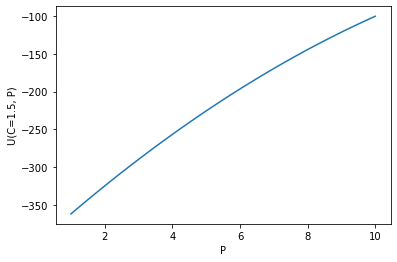

In [30]:
fig, ax = plt.subplots()
C = 1.5
P = np.linspace(1, 10, 100)
ax.plot(P, utility_func(P, C))
ax.set_xlabel("P")
ax.set_ylabel("U(C=1.5, P)")

In [11]:
# Secant method 

def secant_method(f, x0, x1, iterations):
    for i in range(iterations):
        x2 = x1 - f(x1) * (x1 - x0) / float(f(x1) - f(x0))
        x0, x1 = x1, x2
    return x2

def f_example(x):
    return x ** 2 - 612

root = secant_method(f_example, 10, 30, 5)

print("Root: {}".format(root))  

Root: 24.738633748750722


In [12]:
def secant(f,a,b,N):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a,b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    m_N : number
        The x intercept of the secant line on the the Nth interval
            m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        The initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0
        for some intercept m_n then the function returns this solution.
        If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
        iterations, the secant method fails and return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> secant(f,1,2,5)
    1.6180257510729614
    '''
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

In [16]:
g = lambda P : (-(P-20)**2 - 2 * (budget_constraint(W, p_P, p_C, P)-1)**2)
print(g(16))
approx_method = secant_method(g,1,30,50)
print(approx_method)
approx = secant(g, 1, 30, 50)
print(approx)

-48.0
15.48925641443148
Secant method fails.
None


In [31]:
p = lambda x: x**3 - x**2 - 1

approx = secant(p,1,2,20)
print(approx)

1.4655712311394433


In [32]:
from sympy import Symbol, Derivative

x= Symbol('x')

function= x**4 + 7*x**3 + 8

deriv= Derivative(function, x)
deriv.doit()

4*x**3 + 21*x**2

In [1]:
lst = [1, 2, 3]

def f(x, lst):
    return lst[0]*x**2 + lst[1]*x + lst[2]

f(9, lst)

102

In [2]:
from scipy import optimize

def quadratic_roots(lst):
    def f(x):
        return lst[0]*x**2 + lst[1]*x + lst[2]
    sol = optimize.root_scalar(f, bracket= [0, 3], method = 'brentq')
    return sol

# problem is with the bracket where one of f(a) and f(b) must be negative
lst = [1, 2, -3]
quadratic_roots(lst)


      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 1.0